In [ ]:
!pip install scikit_posthocs

Friedman's Test Statistic: 16.0
p-value: 0.003019163651122605
Critical Value: 9.487729036781154
Friedman test is statistically significant. Proceed with post-hoc analysis.

Nemenyi's Test Results:
Algorithm	Mean Rank
SVM Linear	2.0
Decision Tree	4.0
Logistic Regression	1.0
Random Forest	3.0
SVM RBF	5.0

Critical Difference (CD) Value: 3.8045945713938556

Logistic Regression and SVM RBF have a statistically significant performance difference.

Nemenyi's Post-hoc Analysis Results:
          1         2         3         4         5
1  1.000000  0.863191  0.998020  0.979762  0.488271
2  0.863191  1.000000  0.693149  0.993946  0.972095
3  0.998020  0.693149  1.000000  0.904884  0.298847
4  0.979762  0.993946  0.904884  1.000000  0.839214
5  0.488271  0.972095  0.298847  0.839214  1.000000


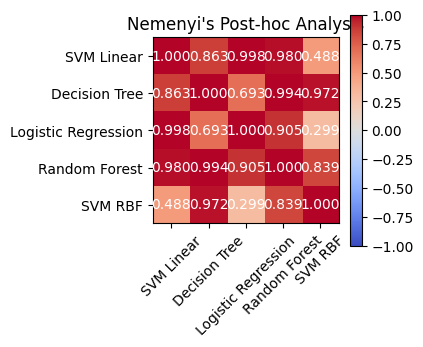

In [ ]:
from scipy.stats import chi2
from scipy.stats import friedmanchisquare
from scipy.stats import rankdata
from scipy.stats import norm
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import numpy as np

# F1 scores for each algorithm and each experiment
algorithm_names = ['SVM Linear', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'SVM RBF']
SVM_Linear = [97.63, 97.75, 85.62, 84.54]
Decision_Tree = [93.44,93.69, 82.40, 82.74]
Logistic_Regression = [98.27, 98.09, 85.66, 84.79]
Random_Forest= [95.11, 95.67, 83.17, 82.78]
SVM_RBF = [83.91, 88.20, 69.31, 72.09]

# Create a 2-dimensional array of F1 scores
f1_scores = np.array([SVM_Linear, Decision_Tree, Logistic_Regression, Random_Forest, SVM_RBF])

# Perform Friedman's test
friedman_statistic, p_value = friedmanchisquare(*f1_scores)

# Print the Friedman's test statistic and p-value
print("Friedman's Test Statistic:", friedman_statistic)
print("p-value:", p_value)

# Degrees of freedom
num_algorithms = len(f1_scores)
df = num_algorithms - 1

# Significance level (alpha)
alpha = 0.05

# Find the critical value
critical_value = chi2.ppf(1 - alpha, df)

# Print the critical value
print("Critical Value:", critical_value)

# Check if Friedman test is statistically significant
if friedman_statistic > critical_value:
    print("Friedman test is statistically significant. Proceed with post-hoc analysis.")
else:
    print("Friedman test is not statistically significant.")

# Perform Friedman's test
friedman_statistic, _ = friedmanchisquare(*f1_scores)

# Compute ranks of the algorithms
ranks = rankdata([-score for score in np.mean(f1_scores, axis=1)])

# Compute the critical difference (CD) value
k = len(f1_scores)
cd = (norm.ppf(1 - 0.005 / (k * (k + 1) / 2))) * np.sqrt(k * (k + 1) / (6 * (k - 1)))

# Print the results
print("\nNemenyi's Test Results:")
print("Algorithm\tMean Rank")
for i in range(len(f1_scores)):
    print(f"{algorithm_names[i]}\t{ranks[i]}")
print("\nCritical Difference (CD) Value:", cd)

# Compare mean ranks with CD value
for i in range(len(f1_scores)):
    for j in range(i+1, len(f1_scores)):
        diff = abs(ranks[i] - ranks[j])
        if diff > cd:
            print(f"\n{algorithm_names[i]} and {algorithm_names[j]} have a statistically significant performance difference.")

# Perform Nemenyi's post-hoc analysis
nemenyi_results = sp.posthoc_nemenyi(f1_scores)

# Print the pairwise comparison results
print("\nNemenyi's Post-hoc Analysis Results:")
print(nemenyi_results)

# Visualize Results Using a Heat Map
plt.imshow(nemenyi_results, cmap='coolwarm', vmin=-1, vmax=1)

# Add the values in the heatmap
for i in range(len(f1_scores)):
    for j in range(len(f1_scores)):
        plt.text(j, i, f'{nemenyi_results.iloc[i, j]:.3f}', ha='center', va='center', color='w')

plt.colorbar()
plt.xticks(np.arange(len(f1_scores)), algorithm_names, rotation=45)
plt.yticks(np.arange(len(f1_scores)), algorithm_names)
plt.xlabel('')
plt.ylabel('')
plt.title("Nemenyi's Post-hoc Analysis")
plt.gcf().set_size_inches(3, 3)
plt.show()